In [1]:
from IPython.display import SVG, display
import os
from pogema import pogema_v0, GridConfig
import torch

DEVICE = torch.device("cpu")

import config
from model import Network
from pogema_tools import PogemaWrapper, run_task
from pogema_tasks import crowdy_task

/Users/rito4ka/dev/base_env/lib/python3.9/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


## **Load model**

In [2]:
network = Network()
state_dict = torch.load(
    os.path.join(config.save_path, f"128000.pth"), map_location=DEVICE
)
network.load_state_dict(state_dict)
network.to(DEVICE)
network.eval()

Network(
  (obs_encoder): Sequential(
    (0): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1))
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Conv2d(192, 256, kernel_size=(3, 3), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Flatten(start_dim=1, end_dim=-1)
  )
  (recurrent): GRUCell(261, 256)
  (comm): CommBlock(
    (request_comm): CommLayer(
      (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (position_embeddings): Linear(in_features=81, out_features=16, bias=True)
      (message_key): Linear(in_features=272, out_features=128, bias=True)
      (message_value): Linear(in_features=272, out_features=128, bias=True)
      (hidden_query): Linear(in_features=256, out_features=128, bias=True)
      

## **Run task with random grid configuration**

(True, 113, 1703)


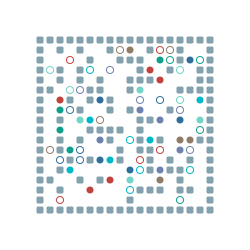

In [3]:
grid_config = GridConfig(
        map_name="demo",
        num_agents=32,
        size=16,
        density=0.3,
        max_episode_steps=config.max_episode_length,
        obs_radius=config.obs_radius,
        on_target="nothing",
        collision_system="soft",
        seed=1,
    )

env = PogemaWrapper(pogema_v0(grid_config=grid_config), animate=True)

print(run_task(env, network))

env.save_animation()

display(SVG(f'{grid_config.map_name}.svg'))

### Life-long version 

(False, 256, 297)


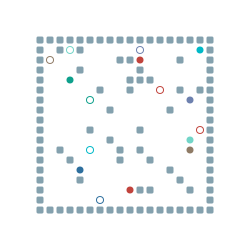

In [4]:
grid_config = GridConfig(
        map_name="demo",
        num_agents=8,
        size=16,
        density=0.15,
        max_episode_steps=config.max_episode_length,
        obs_radius=config.obs_radius,
        on_target="restart",
        collision_system="soft",
        seed=1,
    )

env = PogemaWrapper(pogema_v0(grid_config=grid_config), animate=True)

print(run_task(env, network))

env.save_animation()

display(SVG(f'{grid_config.map_name}.svg'))

## **Run task with custom task configuration**

In [ ]:
grid_config = GridConfig(
    map=crowdy_task["map"],
    map_name=crowdy_task["map_name"],
    num_agents=len(crowdy_task["agents_xy"]),
    agents_xy=crowdy_task["agents_xy"],
    targets_xy=crowdy_task["targets_xy"],
    max_episode_steps=config.max_episode_length,
    obs_radius=config.obs_radius,
    on_target="finish",
    collision_system="soft",
    seed=1,
)

env = PogemaWrapper(pogema_v0(grid_config=grid_config), animate=True)

print(run_task(env, network))

env.save_animation()

display(SVG(f'{grid_config.map_name}.svg'))